# NAM flag table 

 NAM data matrix

Created: 09 November 2023<br>
Last modified: 13 May 2024. Rerunning the code to update the number of substances in the landscape that are associated with existing NAM data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
from scipy.spatial.distance import pdist, squareform
import sys

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_excel(interim_dir+'final_universe_wtest_track_120524.xlsx')

In [4]:
df.shape

(15525, 138)

In [5]:
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

In [6]:
df

,dtxsid,DSSTox_QC-Level,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,smiles,Structure_InChI,Structure_InChIKey,Structure_Formula,...,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD
0,IROQAHVXXUQBOS-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCN(CCNC(=O)c1ccc(Cc2ccc(C(O)=O)cc2)cc1)S(=O)...,NaN,NaN,NaN,...,0.0,0.171,0.498,4.67,[3.1:6.24],6.54,[4.97:8.11],0.0,0.2425,0.3940
1,DTXSID90897582,DSSTox_High,4-(Perfluorononyl)oxybenzenesulfonate sodium,91998-13-9,Single Compound,NaN,[Na+].[O-]S(=O)(=O)C1=CC=C(OC(F)(F)C(F)(F)C(F)...,"InChI=1S/C15H5F19O4S.Na/c16-7(17,8(18,19)10(22...",WEKFOCTWTWPVEG-UHFFFAOYSA-M,C15H4F19NaO4S,...,0.0,0.180,0.237,3.00,[2.52:3.48],1.10,[-1.27:3.47],0.0,0.2895,0.3280
2,DTXSID90896257,Public_Low,(2S)-2-{Bis[4-(heptadecafluorooctyl)phenyl][(t...,914391-37-0,Single Compound,NaN,CC[Si](CC)(CC)OC([C@@H]1CCCN1)(C1=CC=C(C=C1)C(...,"InChI=1S/C39H31F34NOSi/c1-4-76(5-2,6-3)75-23(2...",PARYPNCCAOUHML-QFIPXVFZSA-N,C39H31F34NOSi,...,0.0,0.000,0.000,8.18,[5.6:10.76],8.18,[5.6:10.76],0.0,0.0800,0.0500
3,DTXSID90896196,Public_Low,"2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,9-Heptadecaflu...",157584-47-9,Single Compound,NaN,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F...,"InChI=1S/C21H10F17NO/c22-14(23,13(40)39(11-7-3...",IDJHICNQDCLWAB-UHFFFAOYSA-N,C21H10F17NO,...,0.0,0.214,0.100,8.49,[6.49:10.49],8.49,[6.3:10.68],0.0,0.2840,0.1645
4,DTXSID90896095,Public_Low,"3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,10-Heptadeca...",113823-56-6,Single Compound,NaN,CC1=CC=C(C=C1)S(=O)(=O)OCCC(F)(F)C(F)(F)C(F)(F...,"InChI=1S/C17H11F17O3S/c1-8-2-4-9(5-3-8)38(35,3...",WGCSEECKLMOBLT-UHFFFAOYSA-N,C17H11F17O3S,...,0.0,0.000,0.000,6.50,[6.5:6.5],6.50,[6.5:6.5],0.0,0.2165,0.3860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15520,ZIQDQEQBQRGFDF-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCC[P+](CCCC)(CCCC)(CC(C)=O).[N-](C)S(=O)(=O)...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15521,ZKYPCYQMVQMYAB-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCC[P+](CCCC)(CCCC)(CC(O)CC(O)=O).[O-]S(=O)(=...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15522,ZOJATUBFKQLTCD-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCCOP(C)(=O)(CCCC).OS(=O)(=O)C(F)(F)C(F)(F)C(...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15523,ZRONJOSZRXLGCA-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,CCCCP(O)(=O)(CCCC).OS(=O)(=O)C(F)(F)C(F)(F)C(F...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nams = pd.read_csv(external_dir+'pfas flags uniform_070723.csv')

In [8]:
nams.qc.unique()

array(['P', 'F', 'P/F', 'W'], dtype=object)

In [9]:
nams.shape

(197, 28)

In [10]:
nams['DNT'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [11]:
nams['qc'].unique()

array(['P', 'F', 'P/F', 'W'], dtype=object)

In [12]:
nams['qc'] = nams['qc'].replace({'P' :3, 'F' :0, 'P/F' :2, 'W':1})

In [13]:
nams_p = nams[nams['qc'] ==3]

In [14]:
nams_p.drop(['HTTr', 'HTPP', 'hTTR'], axis = 1, inplace = True)

/tmp/ipykernel_283593/2612978637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nams_p.drop(['HTTr', 'HTPP', 'hTTR'], axis = 1, inplace = True)


In [15]:
nams_p = nams_p[['dtxsid', 'casrn', 'name', 'qc', 'Immune_v3', 'DNT', 'ZF',
       'hDIO1', 'hDIO2', 'hDIO3', 'xDIO3', 'hIYD', 'XIYD', 'hTBG', 'hTPO',
       'NR_ESR1', 'NR_NRF2', 'NR_PPAR', 'NR_PXR', 'NR_RXR',
       ]]

In [16]:
nams_p.rename(columns = {'Immune_v3': 'Immune'}, inplace = True)

In [17]:
nams_p

,dtxsid,casrn,name,qc,Immune,DNT,ZF,hDIO1,hDIO2,hDIO3,xDIO3,hIYD,XIYD,hTBG,hTPO,NR_ESR1,NR_NRF2,NR_PPAR,NR_PXR,NR_RXR
0,DTXSID00190950,375-82-6,6:1 Fluorotelomer alcohol,3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,DTXSID00192353,39108-34-4,8:2 Fluorotelomer sulfonic acid,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,DTXSID00194615,4180-26-1,"1H,1H,9H-Perfluorononyl acrylate",3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
5,DTXSID00379268,356-02-5,3:3 Fluorotelomer carboxylic acid,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
6,DTXSID00379884,54009-81-3,"3-(Perfluoro-3-methylbutyl)-1,2-propenoxide",3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,DTXSID70379917,27854-30-4,"4,4,5,5,6,6,7,7,8,8,9,9,9-Tridecafluorononanoi...",3,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
193,DTXSID70565479,13973-14-3,8H-Perfluorooctanoic acid,3,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
194,DTXSID80380837,151772-59-7,"Perfluoro-3,6,9-trioxadecanoic acid",3,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
195,DTXSID80382154,52447-22-0,Perfluoroheptanoyl chloride,3,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0


In [18]:
nr_confirm = pd.read_excel(interim_dir+'Nuclear Receptor Confirmatory Flags v2.xlsx')

In [19]:
nr_confirm = nr_confirm[nr_confirm['class'] == 'confirmatory assay']

In [20]:
nr_confirmpvt = nr_confirm.pivot_table(index = 'dtxsid', columns = 'target', values = 'positive', aggfunc = 'max')

In [21]:
nr_confirmpvt = nr_confirmpvt.replace(np.nan, 0)

In [22]:
nr_confirmpvt

target,ESR1,NFE2L2,NR1I2,PPARA,PPARG,RARG,RXRB
dtxsid,,,,,,,
DTXSID00194615,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID00380798,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID00892442,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID1032646,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID1037303,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DTXSID1047578,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID30190948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3031864,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTXSID3037709,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
nr_confirmpvt = nr_confirmpvt.applymap(lambda x: 1 if x>= 1 else x)

In [24]:
nams_p = pd.merge(nams_p, nr_confirmpvt, left_on = 'dtxsid', right_on = nr_confirmpvt.index, how = 'left')

In [25]:
nams_p[['dtxsid','NR_ESR1', 'NR_NRF2', 'NR_PPAR', 'NR_PXR', 'NR_RXR', 'ESR1', 'NFE2L2',
       'NR1I2', 'PPARA', 'PPARG', 'RARG', 'RXRB']]

,dtxsid,NR_ESR1,NR_NRF2,NR_PPAR,NR_PXR,NR_RXR,ESR1,NFE2L2,NR1I2,PPARA,PPARG,RARG,RXRB
0,DTXSID00190950,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID00192353,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID00194615,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DTXSID00379268,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID00379884,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DTXSID70379917,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,DTXSID70565479,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
124,DTXSID80380837,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,DTXSID80382154,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
nams_p['NR_ESR1_'] = nams_p[['NR_ESR1', 'ESR1']].sum(axis = 1, skipna = True)

In [27]:
nams_p['NR_PPAR_'] = nams_p[['NR_PPAR', 'PPARA', 'PPARG']].sum(axis = 1, skipna = True)

In [28]:
nams_p['NR_NRF2_'] = nams_p[['NR_NRF2', 'NFE2L2', 'NR1I2']].sum(axis = 1, skipna = True)

In [29]:
nams_p['NR_RXR_'] = nams_p[['NR_RXR', 'RXRB']].sum(axis = 1, skipna = True)

In [30]:
nams_p.drop(['NR_ESR1','NR_NRF2', 'NR_PPAR','NR_RXR', 'ESR1', 'NFE2L2', 'NR1I2',
       'PPARA', 'PPARG', 'RARG', 'RXRB'], axis = 1, inplace = True)

In [31]:
nams_p.columns

Index(['dtxsid', 'casrn', 'name', 'qc', 'Immune', 'DNT', 'ZF', 'hDIO1',
       'hDIO2', 'hDIO3', 'xDIO3', 'hIYD', 'XIYD', 'hTBG', 'hTPO', 'NR_PXR',
       'NR_ESR1_', 'NR_PPAR_', 'NR_NRF2_', 'NR_RXR_'],
      dtype='object')

In [32]:
nams_p = nams_p[['dtxsid', 'casrn', 'name', 'qc','NR_ESR1_', 'NR_PPAR_', 'NR_NRF2_', 'NR_RXR_','NR_PXR', 'ZF','DNT','hDIO1',
       'hDIO2', 'hDIO3', 'xDIO3', 'hIYD', 'XIYD', 'hTBG', 'hTPO', 'Immune']]

In [33]:
nams_p.rename(columns = {'NR_ESR1_':'NR_ESR1' , 'NR_PPAR_':'NR_PPAR', 'NR_NRF2_':'NR_NRF2', 'NR_RXR_':'NR_RXR'}, inplace = True)

In [34]:
nams_p['DNT'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [35]:
tk = pd.read_excel(interim_dir+'pfas flags_to_GP_TK_20230629.xlsx')

In [36]:
tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dtxsid                 197 non-null    object 
 1   casrn                  197 non-null    object 
 2   name                   197 non-null    object 
 3   qc                     197 non-null    object 
 4   HTTK_QC_Pass           197 non-null    int64  
 5   TK_PlasBind_High       197 non-null    int64  
 6   TK_PlasBind_Higher     197 non-null    int64  
 7   TK_PlasBind_Highest    197 non-null    int64  
 8   TK_Metab_Stable        65 non-null     float64
 9   TK_Metab_Slow          65 non-null     float64
 10  TK_Metab_Moderate      65 non-null     float64
 11  TK_Struc_PotMetab-CTS  187 non-null    float64
 12  TK_Struc_Endo          197 non-null    int64  
 13  HTTr                   171 non-null    float64
 14  HTPP                   146 non-null    float64
 15  Immune

In [37]:
tk = tk.iloc[:197, :13]

In [38]:
tk.shape

(197, 13)

In [39]:
mylst = []
for i, row in tk.iterrows():
    if (row['TK_PlasBind_Highest'] == 1) & (row['TK_PlasBind_Higher'] == 1) & (row['TK_PlasBind_High'] == 1):
        mylst.append(3)
    elif (row['TK_PlasBind_Highest'] == 0) & (row['TK_PlasBind_Higher'] == 1) & (row['TK_PlasBind_High'] == 1):
        mylst.append(2)
    elif (row['TK_PlasBind_Highest'] == 0) & (row['TK_PlasBind_Higher'] == 0) & (row['TK_PlasBind_High'] == 1):
        mylst.append(1)
    elif (row['TK_PlasBind_Highest'] == 0) & (row['TK_PlasBind_Higher'] == 0) & (row['TK_PlasBind_High'] == 0):
        mylst.append(0)

In [40]:
len(mylst)

197

In [41]:
tk['TK_PlasBind'] = mylst

In [42]:
tk['TK_PlasBind'].value_counts()

0    115
1     39
3     27
2     16
Name: TK_PlasBind, dtype: int64

In [43]:
tk.columns

Index(['dtxsid', 'casrn', 'name', 'qc', 'HTTK_QC_Pass', 'TK_PlasBind_High',
       'TK_PlasBind_Higher', 'TK_PlasBind_Highest', 'TK_Metab_Stable',
       'TK_Metab_Slow', 'TK_Metab_Moderate', 'TK_Struc_PotMetab-CTS',
       'TK_Struc_Endo', 'TK_PlasBind'],
      dtype='object')

In [44]:
mylst2 = []
for i, row in tk.iterrows():
    if (row['TK_Metab_Moderate'] == 1) :
        mylst2.append(1)
    elif (row['TK_Metab_Slow'] == 1) & (row['TK_Metab_Stable'] == 0) :
        mylst2.append(2)
    elif (row['TK_Metab_Stable'] == 1) & (row['TK_Metab_Slow'] == 1) :
        mylst2.append(3)
    else: 
        mylst2.append(np.nan)

In [45]:
len(mylst2)

197

In [46]:
tk['TK_Metab'] = mylst2

In [47]:
tk['TK_Metab'].value_counts(dropna = False)

NaN    132
3.0     37
1.0     17
2.0     11
Name: TK_Metab, dtype: int64

In [48]:
tk[['dtxsid','HTTK_QC_Pass','TK_Struc_Endo', 'TK_PlasBind', 'TK_Metab']]

,dtxsid,HTTK_QC_Pass,TK_Struc_Endo,TK_PlasBind,TK_Metab
0,DTXSID00190950,0,0,1,NaN
1,DTXSID00192353,1,0,1,1.0
2,DTXSID00194615,0,0,0,NaN
3,DTXSID00223797,0,0,0,NaN
4,DTXSID0036926,0,0,0,NaN
...,...,...,...,...,...
192,DTXSID9059969,0,0,0,NaN
193,DTXSID9061881,0,0,0,NaN
194,DTXSID90868151,1,1,1,3.0
195,DTXSID90880131,0,0,0,NaN


In [49]:
nams_tk = pd.merge(nams_p, tk[['dtxsid','HTTK_QC_Pass','TK_Struc_Endo', 'TK_PlasBind', 'TK_Metab']], on = 'dtxsid', how = 'left')

In [50]:
nams_tk['HTTK_QC_Pass'].value_counts()

1    67
0    60
Name: HTTK_QC_Pass, dtype: int64

In [51]:
nams_tk.rename(columns = {'HTTK_QC_Pass' : 'qc_httk'}, inplace = True)

In [52]:
nams_tk['qc_httk'] = nams_tk['qc_httk'].replace({1 :3})

In [53]:
nams_tk = nams_tk[['dtxsid', 'casrn', 'name', 'qc','qc_httk','NR_ESR1', 'NR_PPAR', 'NR_NRF2',
       'NR_RXR', 'NR_PXR', 'ZF', 'DNT', 'hDIO1', 'hDIO2', 'hDIO3', 'xDIO3',
       'hIYD', 'XIYD', 'hTBG', 'hTPO', 'Immune','TK_PlasBind', 'TK_Metab','TK_Struc_Endo']]

In [54]:
nams_tk['TK_Struc_Endo'] = nams_tk['TK_Struc_Endo'].replace({1 :2}) 

In [55]:
nams_tk

,dtxsid,casrn,name,qc,qc_httk,NR_ESR1,NR_PPAR,NR_NRF2,NR_RXR,NR_PXR,...,hDIO3,xDIO3,hIYD,XIYD,hTBG,hTPO,Immune,TK_PlasBind,TK_Metab,TK_Struc_Endo
0,DTXSID00190950,375-82-6,6:1 Fluorotelomer alcohol,3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0
1,DTXSID00192353,39108-34-4,8:2 Fluorotelomer sulfonic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0
2,DTXSID00194615,4180-26-1,"1H,1H,9H-Perfluorononyl acrylate",3,0,2.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN,0
3,DTXSID00379268,356-02-5,3:3 Fluorotelomer carboxylic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2
4,DTXSID00379884,54009-81-3,"3-(Perfluoro-3-methylbutyl)-1,2-propenoxide",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DTXSID70379917,27854-30-4,"4,4,5,5,6,6,7,7,8,8,9,9,9-Tridecafluorononanoi...",3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1.0,2
123,DTXSID70565479,13973-14-3,8H-Perfluorooctanoic acid,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,2
124,DTXSID80380837,151772-59-7,"Perfluoro-3,6,9-trioxadecanoic acid",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,0
125,DTXSID80382154,52447-22-0,Perfluoroheptanoyl chloride,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3.0,0


In [56]:
nams2 = nams_tk.set_index('dtxsid')

In [57]:
nams2.to_csv(interim_dir+'updated_NAMs_091123.csv')

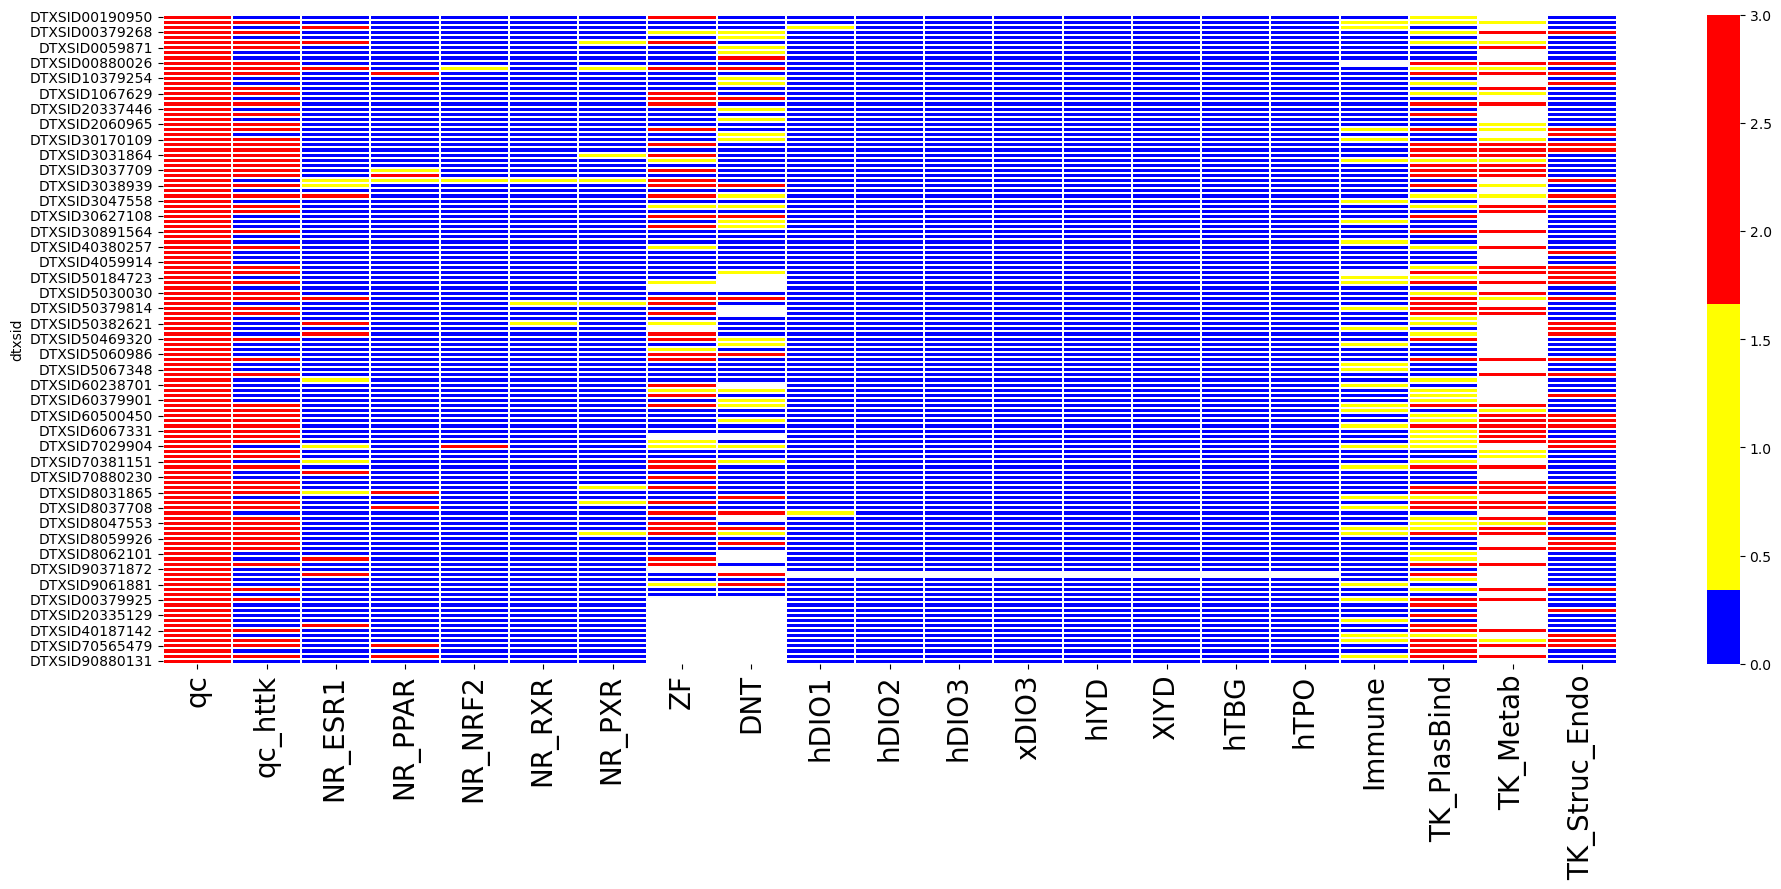

In [57]:
fig,ax = plt.subplots(1,1,figsize=(20,9))
colors = ["#0000FF",'#FFFF00' ,"#FF0000",]
#cmap = sns.light_palette('#0000FF', as_cmap=True)
#cmap = sns.diverging_palette(320, 40, sep=50, as_cmap=True)
sns.heatmap(nams2.iloc[:,2:], cmap = colors, vmin=0, vmax= 3,  linewidth = 0.05, center = 1, square = False, ax=ax)

plt.xticks(fontsize=20)
plt.tight_layout()
fig.savefig(figures_dir+'NAM_flags_091123.png', dpi =300)

In [58]:
len(nams2.index.tolist())

127

In [59]:
df1 = pd.merge(df, nams2.reset_index(), on = 'dtxsid', how = 'left')

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15525 entries, 0 to 15524
Columns: 160 entries, dtxsid to TK_Struc_Endo
dtypes: float64(97), int64(2), object(61)
memory usage: 19.1+ MB


In [62]:

writer = pd.ExcelWriter(interim_dir+'final_new_universe_wNAMS_130524.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df1.to_excel(writer)

writer.close()


In [63]:
len([e for e  in nams2.index.tolist() if e in df['dtxsid'].tolist()])

124

In [64]:
df3 = pd.merge(nams2.reset_index(), df, on = 'dtxsid', how = 'left')

In [65]:
df3

,dtxsid,casrn,name,qc,qc_httk,NR_ESR1,NR_PPAR,NR_NRF2,NR_RXR,NR_PXR,...,AD_pKa,AD_index_pKa,Conf_index_pKa,LogD55_pred,LogD55_predRange,LogD74_pred,LogD74_predRange,AD_LogD,AD_index_LogD,Conf_index_LogD
0,DTXSID00190950,375-82-6,6:1 Fluorotelomer alcohol,3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.159,0.100,2.98,[2.64:3.32],2.90,[0.67:5.13],0.0,0.3960,0.2895
1,DTXSID00192353,39108-34-4,8:2 Fluorotelomer sulfonic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.179,0.231,0.57,[-0.98:2.12],-1.33,[-1.67:-0.99],0.0,0.3365,0.1655
2,DTXSID00194615,4180-26-1,"1H,1H,9H-Perfluorononyl acrylate",3,0,2.0,0.0,0.0,0.0,0,...,0.0,0.000,0.000,5.23,[4.38:6.08],5.23,[4.38:6.08],0.0,0.3020,0.2925
3,DTXSID00379268,356-02-5,3:3 Fluorotelomer carboxylic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.268,0.278,0.96,[-0.16:2.08],-0.94,[-3.96:2.08],0.0,0.4090,0.4300
4,DTXSID00379884,54009-81-3,"3-(Perfluoro-3-methylbutyl)-1,2-propenoxide",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.000,0.000,5.38,[4.93:5.83],5.38,[4.93:5.83],0.0,0.2470,0.3115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DTXSID70379917,27854-30-4,"4,4,5,5,6,6,7,7,8,8,9,9,9-Tridecafluorononanoi...",3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.211,0.221,2.24,[2.02:2.46],0.34,[-1.77:2.45],0.0,0.3915,0.3670
123,DTXSID70565479,13973-14-3,8H-Perfluorooctanoic acid,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.194,0.231,-0.10,[-0.24:0.04],-2.00,[-4.02:0.02],0.0,0.4215,0.3590
124,DTXSID80380837,151772-59-7,"Perfluoro-3,6,9-trioxadecanoic acid",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.158,0.640,-3.49,[-6.7:-0.28],-5.39,[-10.5:-0.28],0.0,0.2525,0.4530
125,DTXSID80382154,52447-22-0,Perfluoroheptanoyl chloride,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.000,0.000,4.61,[3.43:5.3],4.61,[3.43:5.3],0.0,0.2970,0.2570


In [66]:
df4 =df3[df3['group_str'].notnull()]

In [67]:
df4.columns.tolist()[:24] + ['group_str']

['dtxsid',
 'casrn',
 'name',
 'qc',
 'qc_httk',
 'NR_ESR1',
 'NR_PPAR',
 'NR_NRF2',
 'NR_RXR',
 'NR_PXR',
 'ZF',
 'DNT',
 'hDIO1',
 'hDIO2',
 'hDIO3',
 'xDIO3',
 'hIYD',
 'XIYD',
 'hTBG',
 'hTPO',
 'Immune',
 'TK_PlasBind',
 'TK_Metab',
 'TK_Struc_Endo',
 'group_str']

In [68]:
df4 =df4[df4.columns.tolist()[:24] + ['group_str']]

In [69]:
df5 = df4.set_index('dtxsid')

In [71]:
df4

,dtxsid,casrn,name,qc,qc_httk,NR_ESR1,NR_PPAR,NR_NRF2,NR_RXR,NR_PXR,...,xDIO3,hIYD,XIYD,hTBG,hTPO,Immune,TK_PlasBind,TK_Metab,TK_Struc_Endo,group_str
0,DTXSID00190950,375-82-6,6:1 Fluorotelomer alcohol,3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,"('PFAA precursors', 'lt7', 4.0, 2.0)"
1,DTXSID00192353,39108-34-4,8:2 Fluorotelomer sulfonic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0,"('Polyfluoroalkyl acids', 'gte7', nan, nan)"
2,DTXSID00194615,4180-26-1,"1H,1H,9H-Perfluorononyl acrylate",3,0,2.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN,0,"('PolyFCA derivatives', 'gte7', nan, nan)"
3,DTXSID00379268,356-02-5,3:3 Fluorotelomer carboxylic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2,"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)"
4,DTXSID00379884,54009-81-3,"3-(Perfluoro-3-methylbutyl)-1,2-propenoxide",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,"('others, cyclic', 'lt7', 1.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DTXSID70379917,27854-30-4,"4,4,5,5,6,6,7,7,8,8,9,9,9-Tridecafluorononanoi...",3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,1.0,2,"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)"
123,DTXSID70565479,13973-14-3,8H-Perfluorooctanoic acid,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,2,"('Polyfluoroalkyl acids', 'gte7', nan, nan)"
124,DTXSID80380837,151772-59-7,"Perfluoro-3,6,9-trioxadecanoic acid",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,0,"('PFAAs', 'lt7', 4.0, nan)"
125,DTXSID80382154,52447-22-0,Perfluoroheptanoyl chloride,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3.0,0,"('PFAA precursors', 'lt7', 3.0, 2.0)"


In [72]:
df5 = df5.set_index('group_str')

In [73]:
len(set(df5.index))

36

In [74]:
df5.iloc[:,2:]

,qc,qc_httk,NR_ESR1,NR_PPAR,NR_NRF2,NR_RXR,NR_PXR,ZF,DNT,hDIO1,...,hDIO3,xDIO3,hIYD,XIYD,hTBG,hTPO,Immune,TK_PlasBind,TK_Metab,TK_Struc_Endo
group_str,,,,,,,,,,,,,,,,,,,,,
"('PFAA precursors', 'lt7', 4.0, 2.0)",3,0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0
"('Polyfluoroalkyl acids', 'gte7', nan, nan)",3,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0
"('PolyFCA derivatives', 'gte7', nan, nan)",3,0,2.0,0.0,0.0,0.0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN,0
"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)",3,3,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2
"('others, cyclic', 'lt7', 1.0, 1.0)",3,0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)",3,3,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1.0,2
"('Polyfluoroalkyl acids', 'gte7', nan, nan)",3,3,0.0,2.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,2
"('PFAAs', 'lt7', 4.0, nan)",3,0,0.0,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,0


In [75]:
df4.to_csv(interim_dir+'NAM_flags_130524.csv')

In [76]:
df4

,dtxsid,casrn,name,qc,qc_httk,NR_ESR1,NR_PPAR,NR_NRF2,NR_RXR,NR_PXR,...,xDIO3,hIYD,XIYD,hTBG,hTPO,Immune,TK_PlasBind,TK_Metab,TK_Struc_Endo,group_str
0,DTXSID00190950,375-82-6,6:1 Fluorotelomer alcohol,3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,"('PFAA precursors', 'lt7', 4.0, 2.0)"
1,DTXSID00192353,39108-34-4,8:2 Fluorotelomer sulfonic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0,"('Polyfluoroalkyl acids', 'gte7', nan, nan)"
2,DTXSID00194615,4180-26-1,"1H,1H,9H-Perfluorononyl acrylate",3,0,2.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN,0,"('PolyFCA derivatives', 'gte7', nan, nan)"
3,DTXSID00379268,356-02-5,3:3 Fluorotelomer carboxylic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2,"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)"
4,DTXSID00379884,54009-81-3,"3-(Perfluoro-3-methylbutyl)-1,2-propenoxide",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,"('others, cyclic', 'lt7', 1.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DTXSID70379917,27854-30-4,"4,4,5,5,6,6,7,7,8,8,9,9,9-Tridecafluorononanoi...",3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,1.0,2,"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)"
123,DTXSID70565479,13973-14-3,8H-Perfluorooctanoic acid,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,2,"('Polyfluoroalkyl acids', 'gte7', nan, nan)"
124,DTXSID80380837,151772-59-7,"Perfluoro-3,6,9-trioxadecanoic acid",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,0,"('PFAAs', 'lt7', 4.0, nan)"
125,DTXSID80382154,52447-22-0,Perfluoroheptanoyl chloride,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3.0,0,"('PFAA precursors', 'lt7', 3.0, 2.0)"


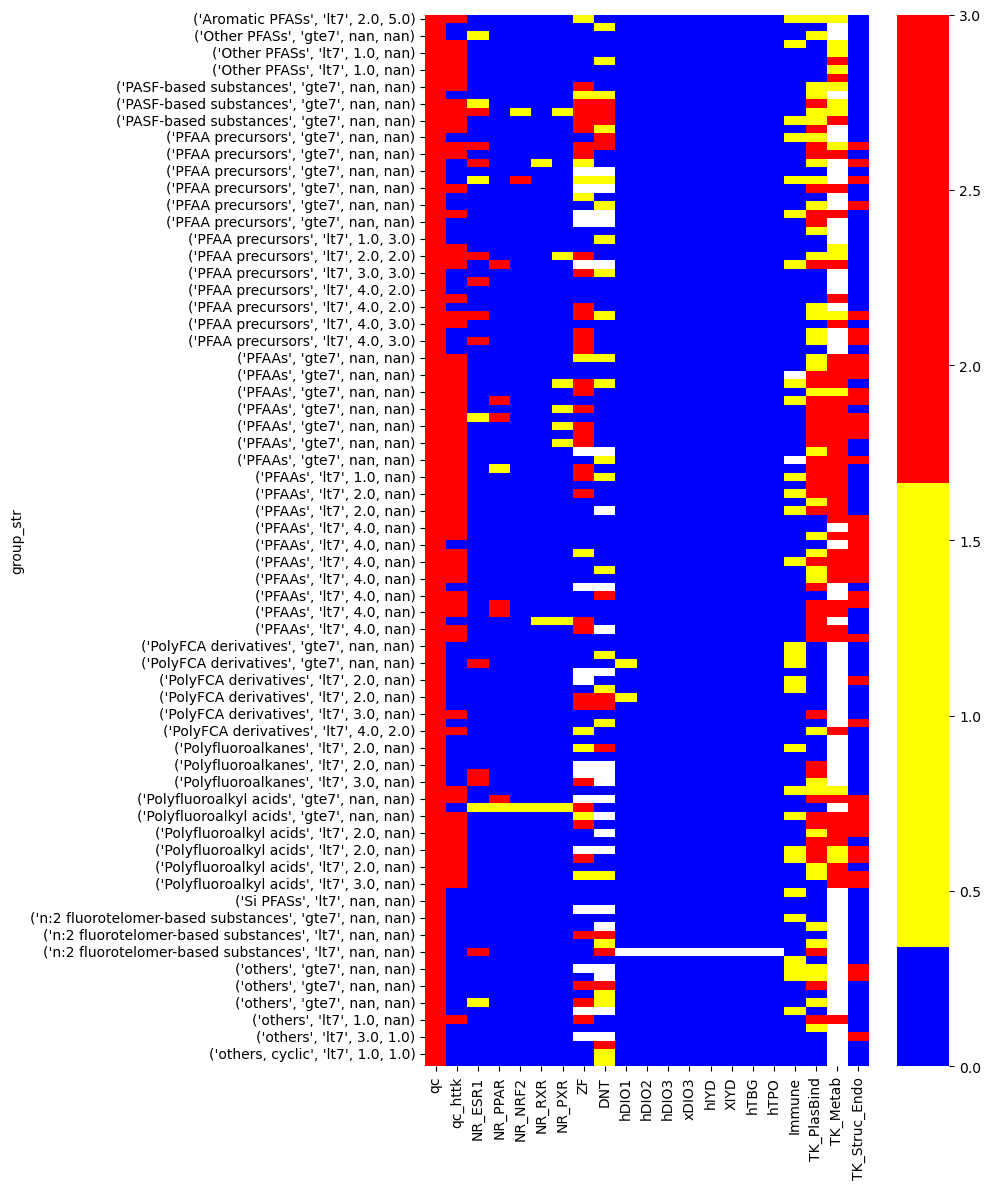

In [77]:
plt.figure(figsize = (10,12))
sns.heatmap(df5.iloc[:,2:].sort_index(), cmap = colors, center = 1)
plt.tight_layout()
plt.savefig(figures_dir+'NAM_flags_cats_130524.png', dpi =300, )

In [78]:
df4

,dtxsid,casrn,name,qc,qc_httk,NR_ESR1,NR_PPAR,NR_NRF2,NR_RXR,NR_PXR,...,xDIO3,hIYD,XIYD,hTBG,hTPO,Immune,TK_PlasBind,TK_Metab,TK_Struc_Endo,group_str
0,DTXSID00190950,375-82-6,6:1 Fluorotelomer alcohol,3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,"('PFAA precursors', 'lt7', 4.0, 2.0)"
1,DTXSID00192353,39108-34-4,8:2 Fluorotelomer sulfonic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0,"('Polyfluoroalkyl acids', 'gte7', nan, nan)"
2,DTXSID00194615,4180-26-1,"1H,1H,9H-Perfluorononyl acrylate",3,0,2.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN,0,"('PolyFCA derivatives', 'gte7', nan, nan)"
3,DTXSID00379268,356-02-5,3:3 Fluorotelomer carboxylic acid,3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,2,"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)"
4,DTXSID00379884,54009-81-3,"3-(Perfluoro-3-methylbutyl)-1,2-propenoxide",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0,"('others, cyclic', 'lt7', 1.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,DTXSID70379917,27854-30-4,"4,4,5,5,6,6,7,7,8,8,9,9,9-Tridecafluorononanoi...",3,3,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,1.0,2,"('Polyfluoroalkyl acids', 'lt7', 2.0, nan)"
123,DTXSID70565479,13973-14-3,8H-Perfluorooctanoic acid,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,3.0,2,"('Polyfluoroalkyl acids', 'gte7', nan, nan)"
124,DTXSID80380837,151772-59-7,"Perfluoro-3,6,9-trioxadecanoic acid",3,0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN,0,"('PFAAs', 'lt7', 4.0, nan)"
125,DTXSID80382154,52447-22-0,Perfluoroheptanoyl chloride,3,3,0.0,2.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,3,3.0,0,"('PFAA precursors', 'lt7', 3.0, 2.0)"


In [79]:
nam_dict = {}
for i, group in df4.groupby('group_str'):
    nam_dict[i] = group

In [80]:
len(nam_dict.keys())

36

In [81]:
for k, v in nam_dict.items():
    if v.shape[0] > 5:
        print(k)

('PFAA precursors', 'gte7', nan, nan)
('PFAAs', 'gte7', nan, nan)
('PFAAs', 'lt7', 4.0, nan)
('Polyfluoroalkyl acids', 'lt7', 2.0, nan)


In [82]:
nam_dict.keys()

dict_keys(["('Aromatic PFASs', 'lt7', 2.0, 5.0)", "('HFCs', 'lt7', 2.0, nan)", "('Other PFASs', 'gte7', nan, nan)", "('Other PFASs', 'lt7', 1.0, nan)", "('PASF-based substances', 'gte7', nan, nan)", "('PASF-based substances', 'lt7', nan, nan)", "('PFAA precursors', 'gte7', nan, nan)", "('PFAA precursors', 'lt7', 1.0, 3.0)", "('PFAA precursors', 'lt7', 2.0, 2.0)", "('PFAA precursors', 'lt7', 3.0, 2.0)", "('PFAA precursors', 'lt7', 3.0, 3.0)", "('PFAA precursors', 'lt7', 4.0, 2.0)", "('PFAA precursors', 'lt7', 4.0, 3.0)", "('PFAA precursors, cyclic', 'lt7', 1.0, 2.0)", "('PFAAs', 'gte7', nan, nan)", "('PFAAs', 'lt7', 1.0, nan)", "('PFAAs', 'lt7', 2.0, nan)", "('PFAAs', 'lt7', 4.0, nan)", "('PolyFCA derivatives', 'gte7', nan, nan)", "('PolyFCA derivatives', 'lt7', 2.0, nan)", "('PolyFCA derivatives', 'lt7', 3.0, nan)", "('PolyFCA derivatives', 'lt7', 4.0, 2.0)", "('Polyfluoroalkanes', 'gte7', nan, nan)", "('Polyfluoroalkanes', 'lt7', 2.0, nan)", "('Polyfluoroalkanes', 'lt7', 3.0, nan)", "